In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Load dataset
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:

y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


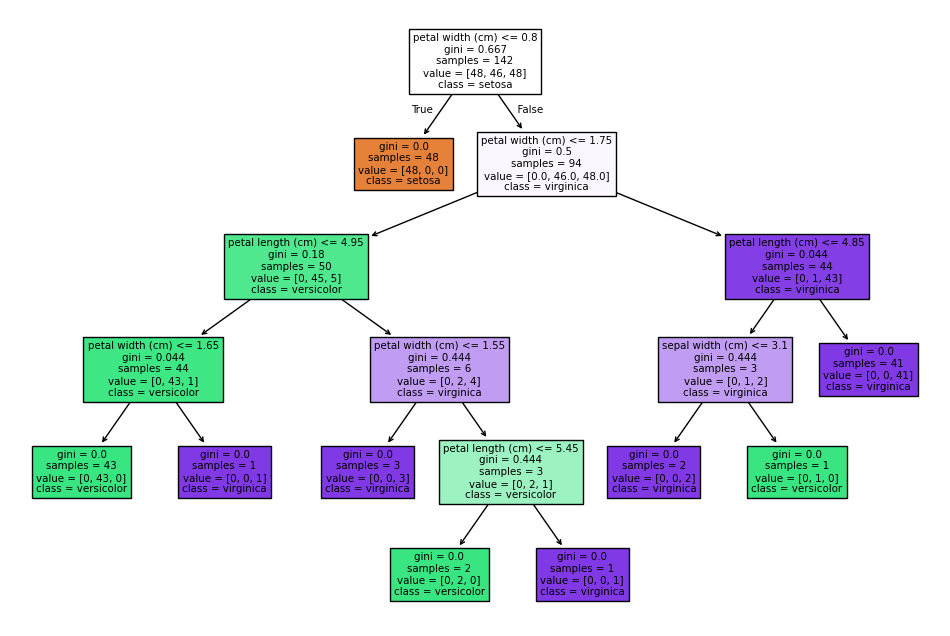

In [7]:
# you can also visualize the decision tree if needed    
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

In [11]:
# Hyperparameter tuning can be done using GridSearchCV or RandomizedSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [5,10,15]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Accuracy after hyperparameter tuning: {best_accuracy:.2f}")

Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}
Best Accuracy after hyperparameter tuning: 1.00


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
# Load dataset
diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.Series(diabetes.target)
df['target'] = target
df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0


In [18]:
# split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [19]:
reg_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, reg_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 6175.67


In [20]:
## Hyperparameter tuning for regression can also be done similarly using GridSearchCV
param_grid_reg = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [5,10,15]
}

grid_search_reg = GridSearchCV(DecisionTreeRegressor(), param_grid_reg, cv=5)
grid_search_reg.fit(X_train, y_train)

print("Best parameters found for regression: ", grid_search_reg.best_params_)
best_reg = grid_search_reg.best_estimator_
reg_pred_best = best_reg.predict(X_test)
best_mse = mean_squared_error(y_test, reg_pred_best)
print(f"Best Mean Squared Error after hyperparameter tuning: {best_mse:.2f}")

Best parameters found for regression:  {'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_split': 15}
Best Mean Squared Error after hyperparameter tuning: 3915.32


### Reference :
-  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html